In [1]:
%load_ext watermark
%watermark

2019-04-07T08:44:40-05:00

CPython 3.7.3rc1
IPython 7.3.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores  : 4
interpreter: 64bit


# Máquinas de Vectores Soporte (Support Vector Machines, ó SVM)

Vamos a ver como utiliar el algoritmo SVM en `scikit-learn`. 

In [24]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 10]

### Cargamos los datos

En este caso vamos a usar un dataset nuevo, el dataset [Iris](https://archive.ics.uci.edu/ml/datasets/iris), que contiene 4 características sobre 3 tipos distintos de variedades de la flor Iris

In [3]:
from sklearn.datasets import load_iris

datos = load_iris()

In [4]:
print(datos.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

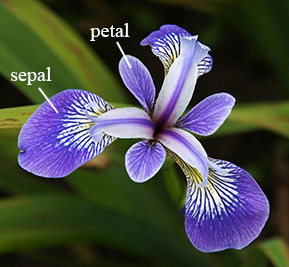

In [5]:
Image("D:/datasets/Curso_Mauel_Garrido/media/iris_with_labels.jpg")

In [6]:
datos.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
datos.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris = pd.DataFrame(datos.data, columns=datos.feature_names)

iris["objetivo"] = datos.target

In [9]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),objetivo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
variables_indep = iris.drop("objetivo", axis=1).columns

iris_X = iris[variables_indep]
iris_y = iris["objetivo"]

In [11]:
from sklearn.model_selection import train_test_split

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.2)

In [12]:
from sklearn.svm import SVC, SVR

In [13]:
estimador_svm =  SVC()

In [14]:
estimador_svm.fit(iris_X_train, iris_y_train)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
estimador_svm.predict(iris_X_test)[:10]

array([1, 1, 1, 0, 1, 2, 2, 0, 0, 0])

- **C** es el parámetro de Coste (que regula el impacto de las variables de holgura y ayuda a regularizar el modelo.
- **kernel** indica que kernel usar (rbf, radial basis function por defecto). Se puede usar cualquier kernel definido por nosotros, por defecto SVC conoce `rbf`, `poly` (polinomial), `linear` (lineal) o `sigmoid` (sigmoide).
- **class_weight**, nos permite pasar un diccionario de la forma `{clase:peso}` que permite asignar más peso a una clase que a otra. Para problemas con clases no balanceadas, podemos usar el parámetro 'balanced' para que se ajusten los pesos en función del número de casos de cada clase. 
- **decision_function_shape** si usar una estrategia de uno contra uno (ovo) o uno contra todos (one versus rest, ovr) en casos de clasificación multiclase.
- **cache_size** es el tamaño (en megabytes) del caché del modelo (cuantos datos puede guardar en memoria y reutilizarlos sin tener que calcularlos). SVMs son computacionalmente complejos asi que si hay mas memoria disponible mejor incrementarl este valor(por ejemplo, a 1000mb o 2000mb)

El parámetro `support_vectors_` nos devuelve los vectores soporte.

In [17]:
estimador_svm.support_vectors_

array([[5.7, 4.4, 1.5, 0.4],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3.4, 1.9, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [6.1, 2.9, 4.7, 1.4],
       [5.5, 2.6, 4.4, 1.2],
       [6. , 2.9, 4.5, 1.5],
       [4.9, 2.4, 3.3, 1. ],
       [6.3, 2.3, 4.4, 1.3],
       [5.6, 3. , 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.8, 2.8, 4.8, 1.4],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [5. , 2. , 3.5, 1. ],
       [5.1, 2.5, 3. , 1.1],
       [6.3, 3.3, 4.7, 1.6],
       [6. , 2.7, 5.1, 1.6],
       [6.9, 3.1, 4.9, 1.5],
       [6.7, 3. , 5. , 1.7],
       [7. , 3.2, 4.7, 1.4],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3. , 4.5, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.2, 2.8, 4.8, 1.8],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.1, 5.1, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [6. , 3. , 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3

El parámetro `n_support_` nos dice cuantos vectores soporte (es decir, puntos tocando el margen del hiperplano de decisión) existen por clase, esto nos da una medida de cuan faciles son de separar cada clase.

In [18]:
estimador_svm.n_support_

array([ 5, 19, 16])

# Kernels

Vamos a ver el efecto que tienen diferentes kernels en la creación del hiperplano de decisión.

Para verlo en un gráfico de dispersión tomamos solo las dos primeras variables del dataset (longitud y grosor del sépalo).

In [20]:
X = datos.data[:, :2]
y = datos.target

Vamos a usar una función de mlxtend, `plot_decision_regions` que hace un diagrama de los datos indicando las distintas regiones de decisión para cada clase.

In [21]:
from mlxtend.plotting import plot_decision_regions

En primer lugar tenemos el kernel lineal, que se define así:

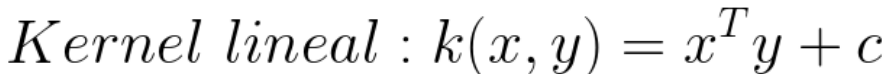

In [22]:
Image("D:/datasets/Curso_Mauel_Garrido/media/kernel_lineal.png")

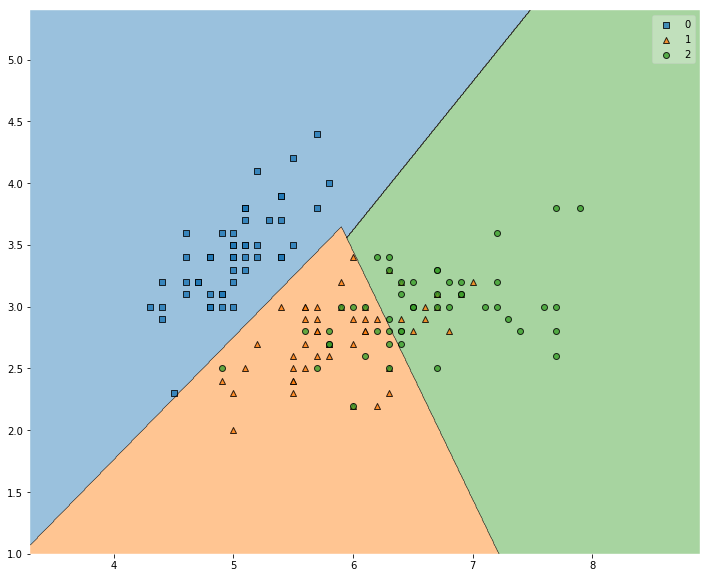

In [25]:
estimador_svm_lineal = SVC(kernel="linear")
estimador_svm_lineal.fit(X, y)

plot_decision_regions(X, y, clf=estimador_svm_lineal);

El kernel polinomial calcula el producto escalar de dos vectores en un espacio dimensional donde tiene en cuenta las combinaciones polinómicas de los mismos. Esto es, si tenemos dos vectores V1 y V2 de la forma `[x1, x2]` el kernel polinomial va a producir un resultado similar a hacer un producto escalar de V1 y V2 pero transformados como `[x1, x2, x1^2, x1x2, x2^2...]`. Tiene la forma:

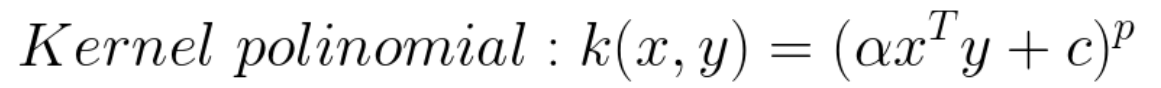

In [27]:
Image("D:/datasets/Curso_Mauel_Garrido/media/kernel_polinomial.png")

El kernel polinomial tiene el hiperparámetro `degree` que indica el grado de expansión polinómica (esto es, el grado de las combinaciones de las variables que queremos tener en cuenta). Por defecto es 3.

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


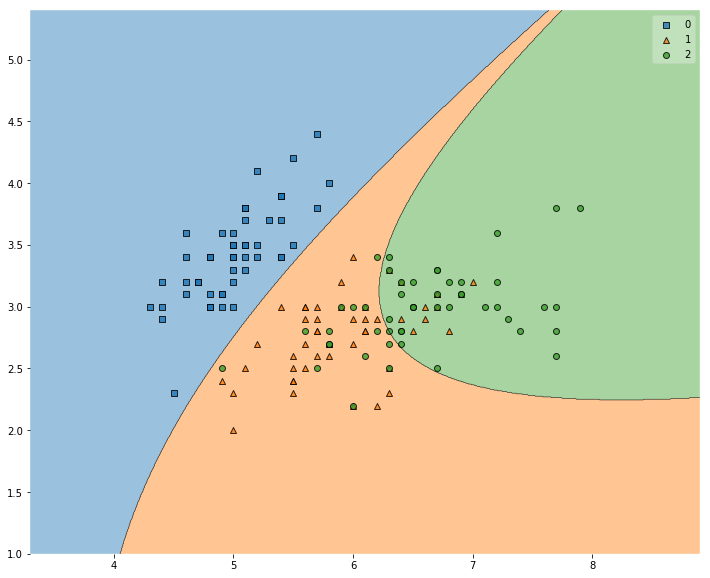

In [28]:
estimador_svm_polinomial = SVC(kernel="poly")
estimador_svm_polinomial.fit(X, y)

plot_decision_regions(X, y, clf=estimador_svm_polinomial);

Podemos ver como varia la frontera de decisión en función de los grados de expansión. Cuantos más grados más complejo podrá ser el hiperplano. Con grado 1 se convierte en un kernel lineal.

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


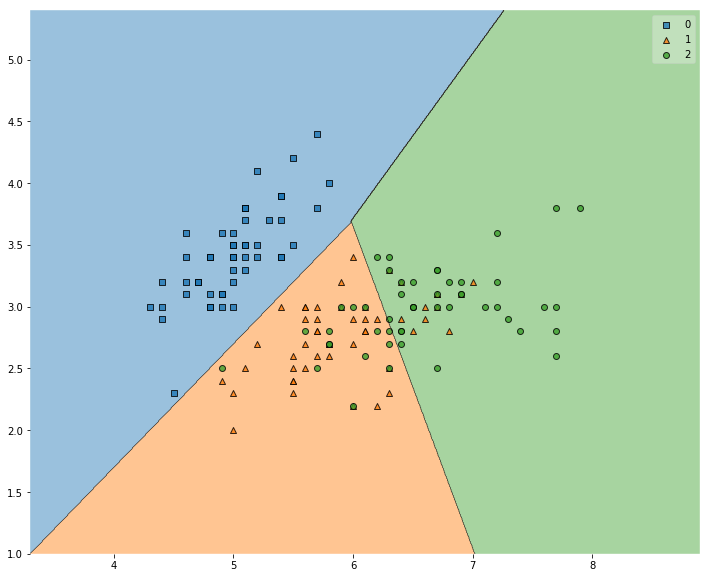

In [29]:
estimador_svm_polinomial = SVC(kernel="poly", degree=1).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial);

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


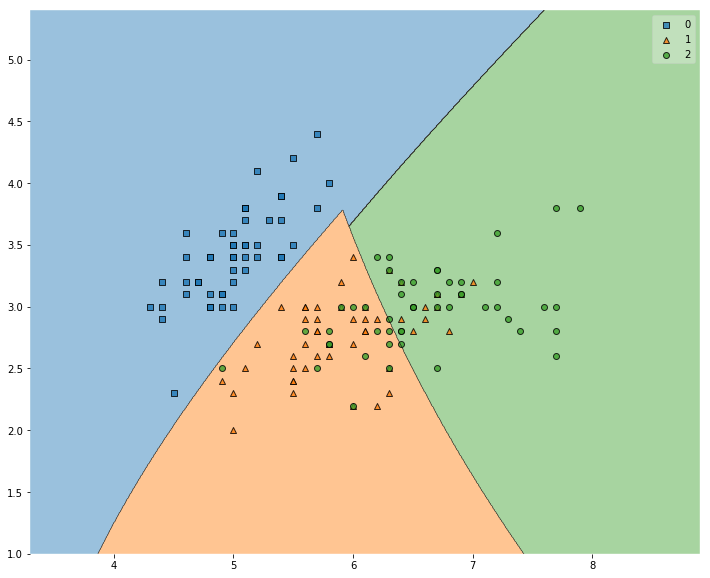

In [31]:
estimador_svm_polinomial = SVC(kernel="poly", degree=2).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial);

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


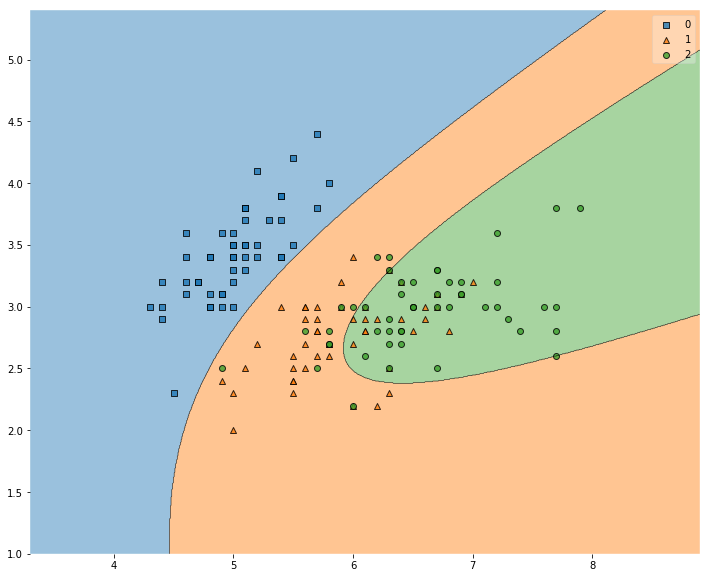

In [32]:
estimador_svm_polinomial = SVC(kernel="poly", degree=6).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial);

El kernel polinomial tiene también el parámetro que lo regula, alpha en la ecuación de arriba, aunque en la implementación de scikit-learn se llama `gamma` 

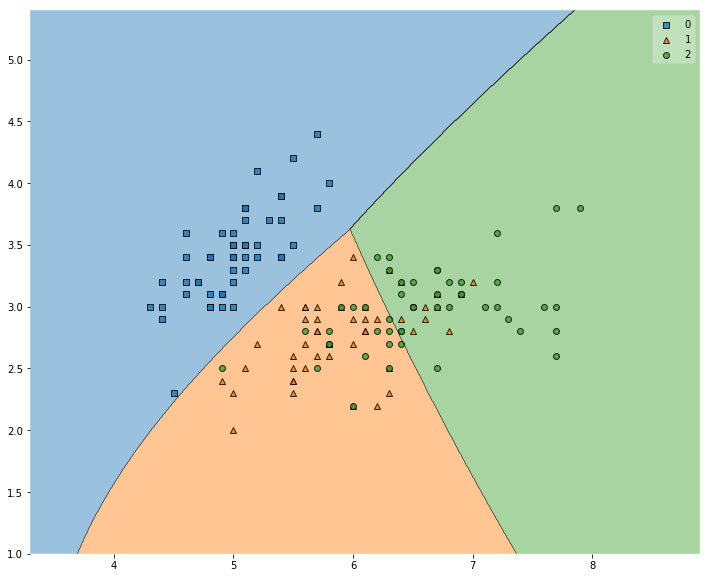

In [33]:
estimador_svm_polinomial = SVC(kernel="poly", degree=3, gamma=0.1).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial);

Vemos que un gamma bajo reduce la complejidad del kernel polinomial convirtiendolo prácticamente en lineal. Si no se especifica se usa `gamma=1/n_variables`, o sea en este caso 1/2

El kernel gausiano (radial basis function, o rbf) hace una transformacion radial (esto es, en funcion de la distancia de los puntos al origen). Tiene la fórmula:

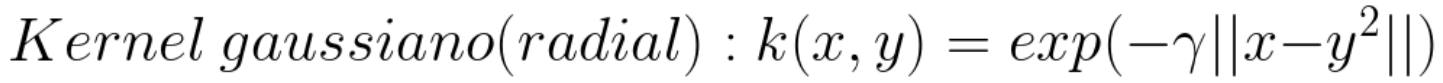

In [34]:
Image("D:/datasets/Curso_Mauel_Garrido/media/kernel_rbf.png")

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


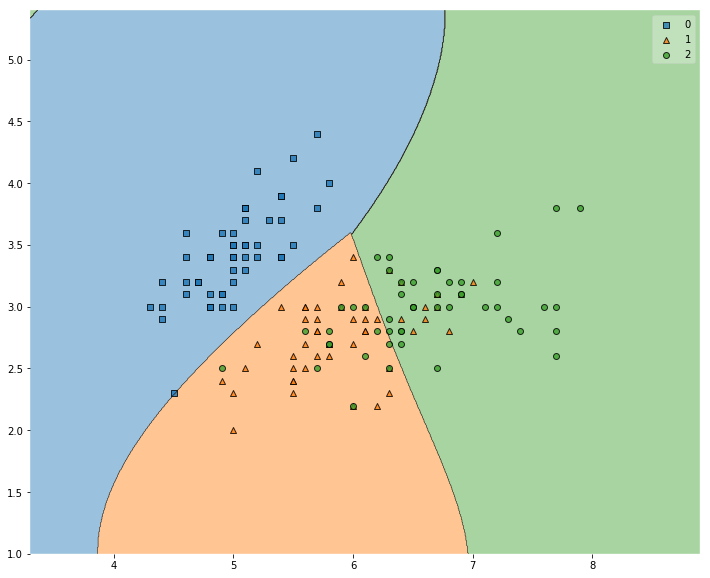

In [35]:
estimador_svm_rbf = SVC(kernel="rbf")
estimador_svm_rbf.fit(X, y)

plot_decision_regions(X, y, clf=estimador_svm_rbf);

Podemos probar como varia la frontera de decisión en función de gamma:

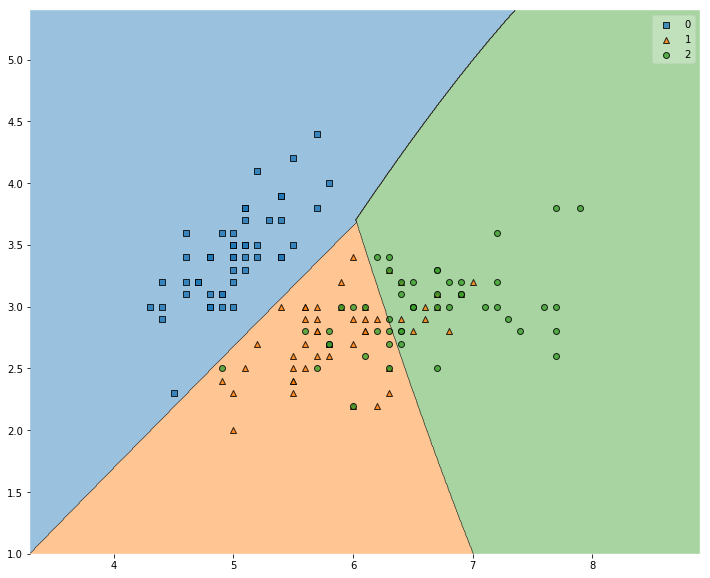

In [36]:
estimador_svm_rbf = SVC(kernel="rbf", gamma=0.1).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_rbf);

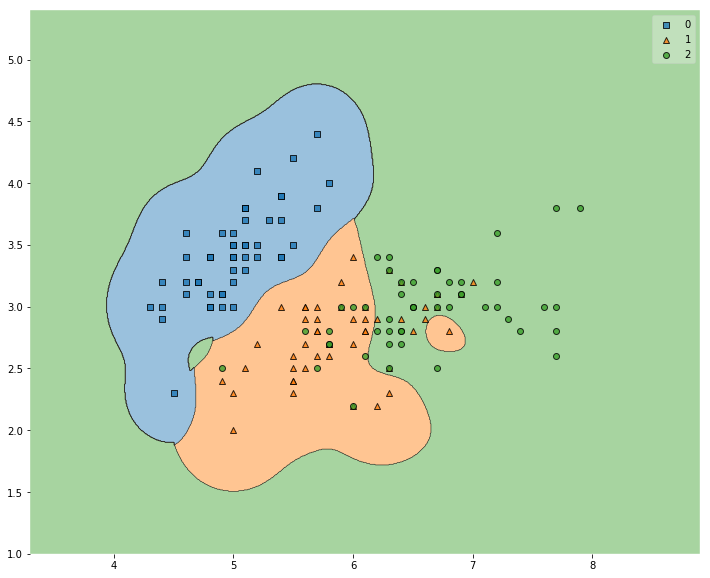

In [37]:
estimador_svm_rbf = SVC(kernel="rbf", gamma=10).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_rbf);

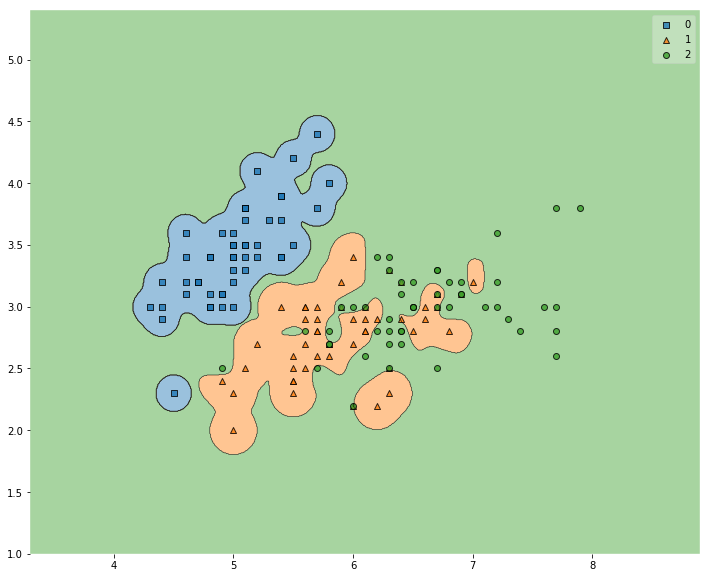

In [38]:
estimador_svm_rbf = SVC(kernel="rbf", gamma=100).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_rbf);

A mayores valores de `gamma` mayor es la capacidad del kernel rbf de crear segmentos alrededor de los datos. 
Vemos que para `gamma=100` el modelo está sobreajustando mucho (creando pequeñas burbujas alrededor de cada observación).

# Parámetro de coste C

El parámetro C nos da una medida de como queremos penalizar al modelo cuando clasifica un ejemplo de forma errónea y es la manera de regularizar los modelos SVM. Valores altos de C permiten controlar la complejidad del modelo (evitando el sobreajuste) a coste de no clasificar bien un porcentaje de los ejemplos en los datos de entrenamiento

In [39]:
from sklearn.model_selection import validation_curve

In [40]:
rango_c = np.linspace(0.01,50,50)

In [41]:
estimador_svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
train_scores, test_scores = validation_curve(estimador_svm, iris_X, iris_y, param_name="C",
                                             param_range=rango_c, cv=10, scoring="f1_weighted")

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

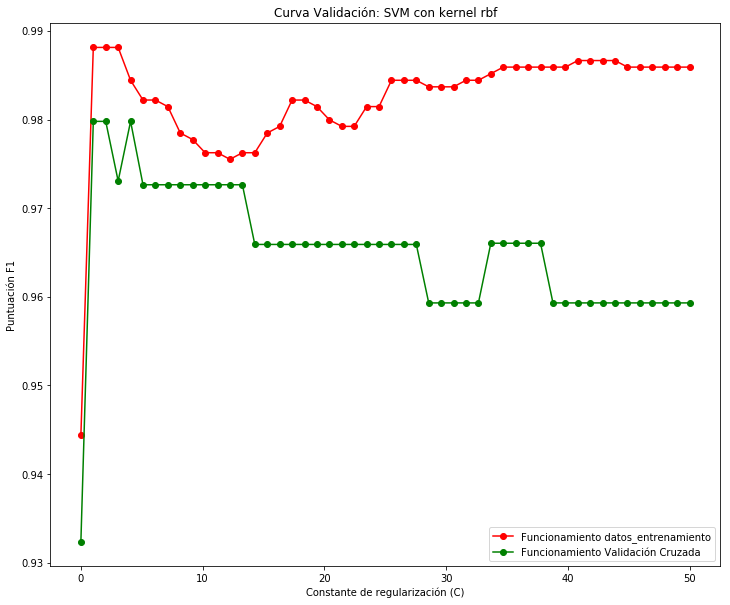

In [43]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(rango_c, train_scores_mean, 'o-', color="r",
             label="Funcionamiento datos_entrenamiento")
plt.plot(rango_c, test_scores_mean, 'o-', color="g",
             label="Funcionamiento Validación Cruzada")
plt.title("Curva Validación: SVM con kernel rbf")
plt.xlabel("Constante de regularización (C)")
plt.ylabel("Puntuación F1")
plt.legend();

Vemos que conforme aumenta C, el modelo sobreajusta más (ya que mejora su funcionamiento en los datos de entrenamiento pero empeora en los de test).

 # Probabilidades

Los modelos SVM no proporcionan probabilidades (por que no hacen inferencia estadística en ese sentido, sino que funcionan de un modo geométrico), por eso por defecto el modelo `SVC` no proporciona el metodo `predict_proba` que hemos visto en otros estimadores (regresión logística por ejemplo).

Sin embargo, la implementación de sklearn permite pasarle el parámetro `probability=True` que calcula de forma adicional las probabilidades usando escalado de Platt (básicamente, entrena una regresión logística en las distancias al hiperplano computadas por el SVM).

Éste método es computacionalmente complejo, y además tiene ciertos fallos teóricos (por ejemplo, puede haber casos en los que se prediga una clase en un problema de clasificación binaria y que su método `predict_proba` produzca una probabilidad menor que 0.5). 

Para aquellos casos que se necesite una forma de puntuar nuevas observaciones pero que dicha puntuacion no tenga que ser una probabilidad es mejor usar directamente el output de la función de decisión con `decision_function`

In [44]:
estimador_svm =  SVC()

estimador_svm.fit(iris_X_train, iris_y_train)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [45]:
estimador_svm.predict(iris_X_test)[:10]

array([1, 1, 1, 0, 1, 2, 2, 0, 0, 0])

In [46]:
estimador_svm.decision_function(iris_X_test)[:10]

array([[-0.35194567,  2.41965854,  0.93228713],
       [-0.30589882,  2.42658488,  0.87931394],
       [-0.33399308,  2.26106227,  1.07293081],
       [ 2.3541749 ,  0.86645993, -0.22063483],
       [-0.32332704,  2.46465349,  0.85867355],
       [-0.1895787 ,  0.91435854,  2.27522016],
       [-0.28472357,  0.84665949,  2.43806408],
       [ 2.37834485,  0.83129664, -0.20964149],
       [ 2.36616602,  0.8485851 , -0.21475112],
       [ 2.37068242,  0.80924131, -0.17992373]])

In [50]:
estimador_svm.predict_proba(iris_X_test)[:10]

AttributeError: predict_proba is not available when  probability=False

In [51]:
estimador_svm_prob =  SVC(probability=True)
estimador_svm_prob.fit(iris_X_train, iris_y_train)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
estimador_svm_prob.predict_proba(iris_X_test)[:10]

array([[0.0068547 , 0.97571012, 0.01743518],
       [0.01219169, 0.97832029, 0.00948802],
       [0.01175017, 0.80005445, 0.18819539],
       [0.94906262, 0.02970247, 0.02123491],
       [0.00909837, 0.98484458, 0.00605705],
       [0.03471058, 0.06660823, 0.89868119],
       [0.01192342, 0.00705494, 0.98102164],
       [0.95880294, 0.0217406 , 0.01945646],
       [0.95419111, 0.02530872, 0.02050017],
       [0.95360908, 0.02025895, 0.02613197]])

Vemos que usando `probability=True` se pueden calcular las "probabilidades"